# Final Project, ROC curves of different classifiers
[Santander Customer Satisfaction](https://www.kaggle.com/c/santander-customer-satisfaction) research

## Load open source libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.metrics import roc_auc_score,roc_curve

from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import SelectFromModel

%matplotlib inline

## Load datasets

In [2]:
df_train = pd.read_csv("data/clean_train.csv")
df_train.shape

(76020, 308)

In [3]:
df_train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,39205.170000,0
1,3,2,34,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,49278.030000,0
2,4,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,67333.770000,0
3,8,2,37,0,195,195,0,0,0,0,...,0,0,0,0,0,0,0,0,64007.970000,0
4,10,2,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,117310.979016,0


In [4]:
df_test = pd.read_csv("data/clean_test.csv")
df_test.shape

(75818, 307)

In [5]:
df_test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,40532.10
1,5,2,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,45486.72
2,6,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,46993.95
3,7,2,24,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,187898.61
4,9,2,23,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,73649.73


In [6]:
# train dataset
y = df_train['TARGET']
X = df_train.drop(['ID','TARGET'], axis=1)

# test dataset
test_id = df_test['ID']
test = df_test.drop(['ID'], axis=1)

#split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, test.shape)

((60816, 306), (15204, 306), (75818, 306))


In [7]:
#Feature selection
sclf = ExtraTreesClassifier(n_estimators=50,max_depth=50)
selector = sclf.fit(X_train, y_train)
fs = SelectFromModel(selector, prefit=True)

X_train = fs.transform(X_train)
X_test = fs.transform(X_test)
test = fs.transform(test)

print(X_train.shape, X_test.shape, test.shape)

((60816, 61), (15204, 61), (75818, 61))


In [8]:
names = ["AdaBoostClassifier","ExtraTreesClassifier","GradientBoostingClassifier",
         "RandomForestClassifier","DecisionTreeClassifier","ExtraTreeClassifier",
         "LogisticRegression","GaussianNB","BernoulliNB","KNeighborsClassifier"]
models = [
    # sklearn.ensemble: Ensemble Methods 
    AdaBoostClassifier(),# AdaBoost classifier
    ExtraTreesClassifier(), # extra-trees classifier
    GradientBoostingClassifier(), # gradient boosting classifier
    RandomForestClassifier(), # random forest classifier
    
    # sklearn.tree: Decision Trees
    DecisionTreeClassifier(), # decision tree classifier
    ExtraTreeClassifier(), # extremely randomized tree classifier
    
    # sklearn.linear_model: Generalized Linear Models
    LogisticRegression(), # logistic regression classifier
    
    # sklearn.naive_bayes: Naive Bayes
    GaussianNB(), # Gaussian Naive Bayes (GaussianNB)
    BernoulliNB(), # Naive Bayes classifier for multivariate Bernoulli models
    
    # sklearn.neighbors: Nearest Neighbors
    KNeighborsClassifier() # Classifier implementing the k-nearest neighbors vote.
]

('ROC AUC: AdaBoostClassifier', 0.81575303815824363)
('ROC AUC: ExtraTreesClassifier', 0.64117796615531686)
('ROC AUC: GradientBoostingClassifier', 0.82300222436842496)
('ROC AUC: RandomForestClassifier', 0.68044678340909914)
('ROC AUC: DecisionTreeClassifier', 0.57668244106459077)
('ROC AUC: ExtraTreeClassifier', 0.5735830508533073)
('ROC AUC: LogisticRegression', 0.57965068154717569)
('ROC AUC: GaussianNB', 0.75203129646683786)
('ROC AUC: BernoulliNB', 0.66861586992247779)
('ROC AUC: KNeighborsClassifier', 0.59017136322665142)


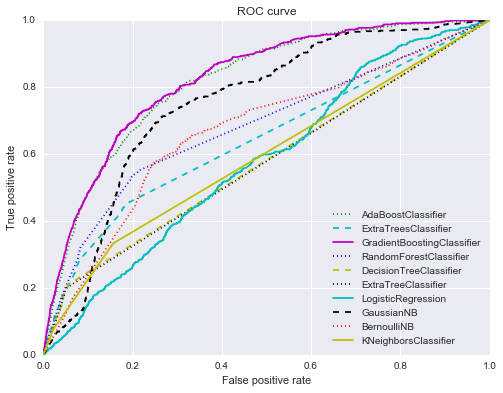

In [9]:
from cycler import cycler
plt.figure(figsize=(8,6))
plt.rc('axes', prop_cycle=(cycler('color', ['g', 'c', 'm', 'b', 'y', 'k', 'c', 'k', 'r', 'y']) +
                           cycler('linestyle', [':', '--', '-',':', '--', ':', '-', '--', ':', '-',])))
for name,model in zip(names,models):
    model.fit(X_train,y_train)
    y_pred = model.predict_proba(X_test)[:,1]
    print ("ROC AUC: "+name, roc_auc_score(y_test, y_pred, average='macro'))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    plt.plot(fpr, tpr, label=name)

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend(loc='best')
plt.show() 